<a href="https://colab.research.google.com/github/ManG0A2/MLP-class/blob/main/%EA%B3%BC%EC%A0%9C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
from google.colab import drive

In [17]:
titanic = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/gender_submission.csv")
tt = titanic
tt

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
'''
타이타닉 데이터 세트를 이용하여
* SGD분류,
* 결정트리,
* 랜덤포래스트,
* 히스토그램기반 그래디언트 부스팅

모델을 만들고 최적화.
'''

In [19]:
tt.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [20]:
#결측치 확인결과 결측치는 없다.
tt.isnull().sum(axis=0)

PassengerId    0
Survived       0
dtype: int64

In [21]:
#넘파이 배열로

tt_input = tt[['PassengerId']].to_numpy()
tt_target =tt['Survived'].to_numpy()

In [22]:
#train_test split
#기본값인 25프로로 제작했다.

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    tt_input, tt_target, random_state=202133532)

print(train_input.shape)
print(train_target.shape)

(313, 1)
(313,)


In [23]:
#정규화


from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [24]:
#SGD Classifier(확률적 경사하강법)

from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=10, random_state=202133532)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.3546325878594249
0.3904761904761905


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [25]:
#전진적 학습 실행

sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.645367412140575
0.6095238095238096


In [26]:
sc = SGDClassifier(loss='log', random_state=202133532)
train_score = []
test_score = []
classes = np.unique(train_target)

In [27]:
for _ in range(0, 50):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


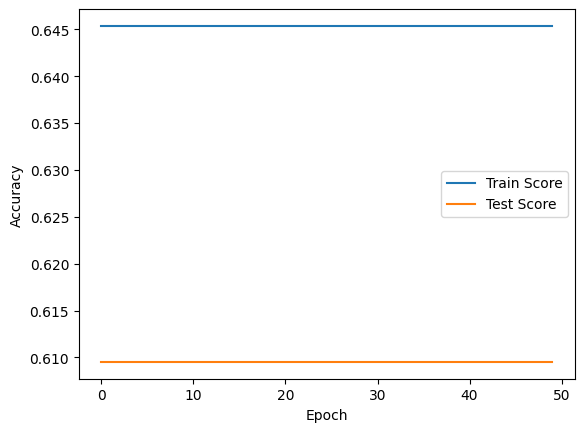

In [28]:
import matplotlib.pyplot as plt

plt.plot(train_score, label='Train Score')
plt.plot(test_score, label='Test Score')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
sc = SGDClassifier(loss='log', max_iter=5, tol=None, random_state=202133532)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.645367412140575
0.6095238095238096


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [30]:
#결정트리

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=202133532)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

1.0
0.45714285714285713


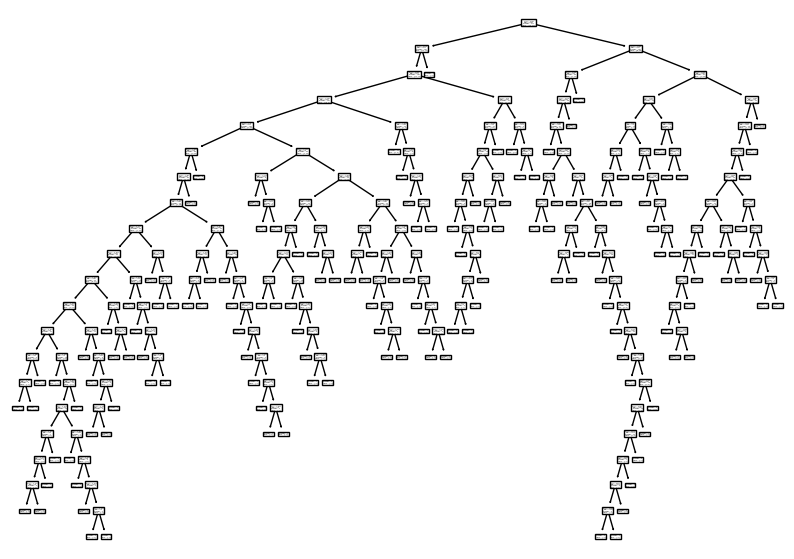

In [31]:
#매우 과적합된 모델이다.
#일단 대충 트리 구조를 눈으로 확인하자. 그래야지 몇층으로 줄일지 결정이 될 것 같다,

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

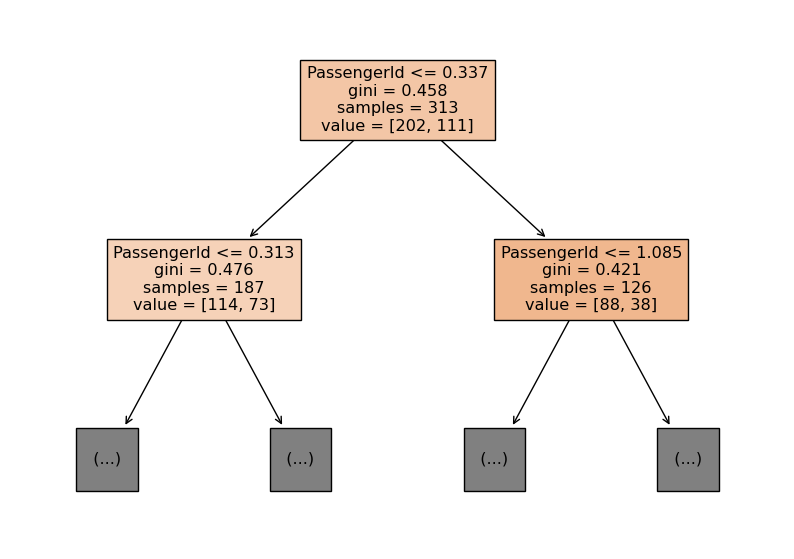

In [32]:
#max_depth 매개변수를 1로 주면 루트 노드를 제외하고 하나의 노드를 더 확장하여 그린다.
#자동으로 나눈 기준을 확인해보자

plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['PassengerId'])
plt.show()

In [33]:
#그렇다면 이제 max_depth 를 몇으로 해야 최선의 결과가 나타나는지 확인해보겠다.
#for문 최대횟수를 25로 한 이유는 위 첫번째 트리가 루트노트가 약 25~30층정도 되는것 같아 보였기 때문이다.

train_score = []
test_score = []
for i in range(1,25):
  dt = DecisionTreeClassifier(max_depth=i, random_state=202133532)
  dt.fit(train_scaled, train_target)

  train_score.append(dt.score(train_scaled, train_target))
  test_score.append(dt.score(test_scaled, test_target))

print(train_score)
print(test_score)

[0.645367412140575, 0.6549520766773163, 0.670926517571885, 0.6837060702875399, 0.7060702875399361, 0.7507987220447284, 0.7731629392971247, 0.8083067092651757, 0.8466453674121406, 0.8722044728434505, 0.9041533546325878, 0.9201277955271565, 0.9361022364217252, 0.9584664536741214, 0.9648562300319489, 0.9776357827476039, 0.9840255591054313, 0.9904153354632588, 0.9936102236421726, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.6095238095238096, 0.6095238095238096, 0.580952380952381, 0.5523809523809524, 0.6095238095238096, 0.5619047619047619, 0.5047619047619047, 0.5238095238095238, 0.49523809523809526, 0.5142857142857142, 0.5047619047619047, 0.49523809523809526, 0.49523809523809526, 0.47619047619047616, 0.47619047619047616, 0.45714285714285713, 0.4666666666666667, 0.4666666666666667, 0.45714285714285713, 0.45714285714285713, 0.45714285714285713, 0.45714285714285713, 0.45714285714285713, 0.45714285714285713]


In [34]:
#max_depth 5일때 나오는 결과가 최선인 것 같아보인다.

dt = DecisionTreeClassifier(max_depth=5, random_state=202133532)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.7060702875399361
0.6095238095238096


In [35]:
#랜덤 포레스트

from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, random_state=202133532)

scores = cross_validate( rf, train_input, train_target,
                       return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9992000000000001 0.5177675371223758


In [36]:
#최적의 하이퍼파라메타를 찾아보자

from scipy.stats import uniform, randint

params = {'min_impurity_decrease': uniform(0.0001, 0.001),
         'max_depth': randint(20, 50),
         'min_samples_split': randint(2, 25),
         'min_samples_leaf': randint(1,25),
         }

In [37]:
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(RandomForestClassifier(random_state=202133532), params,
                                              n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=202133532),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fc8e0fe2380>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fc8e1325270>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fc8e0fe1de0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fc8e0fe3f10>},
                   random_state=42)

In [38]:
print(gs.best_params_)

{'max_depth': 23, 'min_impurity_decrease': 0.00028485445552552704, 'min_samples_leaf': 18, 'min_samples_split': 13}


In [39]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, max_depth=23,min_impurity_decrease=0.00028485445552552704, min_samples_leaf= 18, min_samples_split= 13,random_state=202133532)

scores = cross_validate( rf, train_input, train_target,
                       return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.6573418326693227 0.632616487455197


In [40]:
#히스토그램기반 그래디언트 부스팅

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=202133532)
scores = cross_validate(hgb, train_input, train_target,
                       return_train_score=True)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.7627824701195219 0.6038402457757297
